Overview: This project will discuss the relationship between Natural Gas Price Versus Heating Degree Day(HDD) by creating an accurate model using computer science concepts. This experience is relevant to building models that are utilized to predict real world metrics, such as oil future prices. The student will data gathered online to build a model to predict the two metrics, and perform a metanalysis on how accurate the model is.

In [15]:
#Import statements
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import linregress
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np

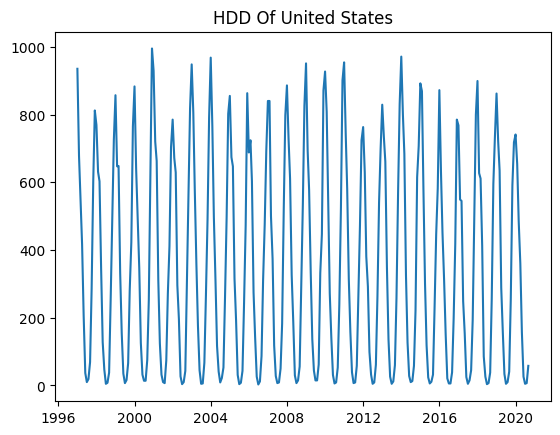

In [16]:
#HDD Plot
df = pd.read_csv("output.csv")
df['Month'] = pd.to_datetime(df['Month'])
plt.title('HDD Of United States')
plt.plot(df.Month, df.Data1)

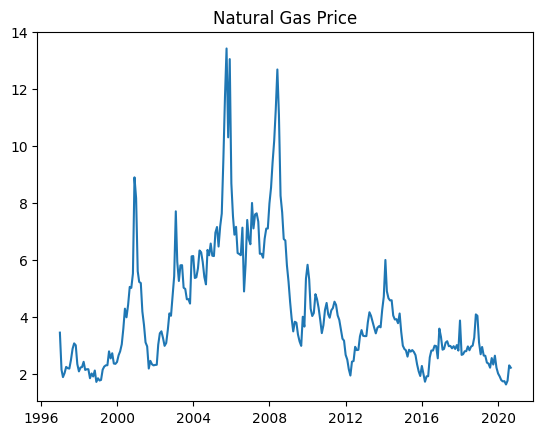

In [17]:
#Natural Gas Price Plot
plt.title('Natural Gas Price')
plt.plot(df.Month, df.Data2)

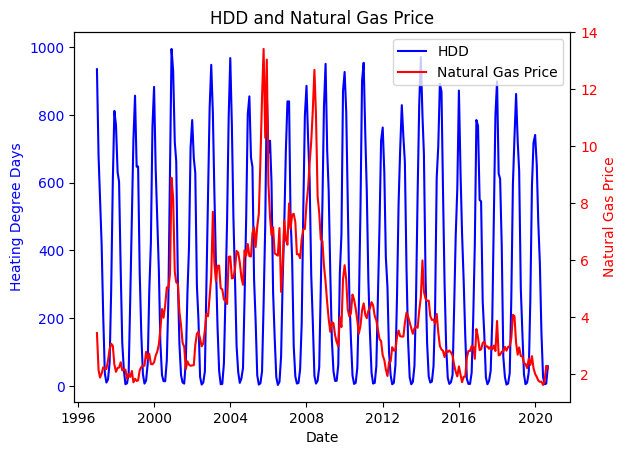

In [18]:
#HDD and Natural Gas Price on Same Plot
fig, ax1 = plt.subplots()

ax1.plot(df.Month, df.Data1, 'b-', label='HDD')  # 'bo' for blue points dashes for a line
ax1.set_xlabel('Date')
ax1.set_ylabel('Heating Degree Days', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a second y-axis for the second dataset
ax2 = ax1.twinx()  # Shares the same x-axis as ax1

ax2.plot(df.Month, df.Data2, 'r-', label='Natural Gas Price')  # 'ro' for red points
ax2.set_ylabel('Natural Gas Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Displaying legends for both datasets
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.title('HDD and Natural Gas Price')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


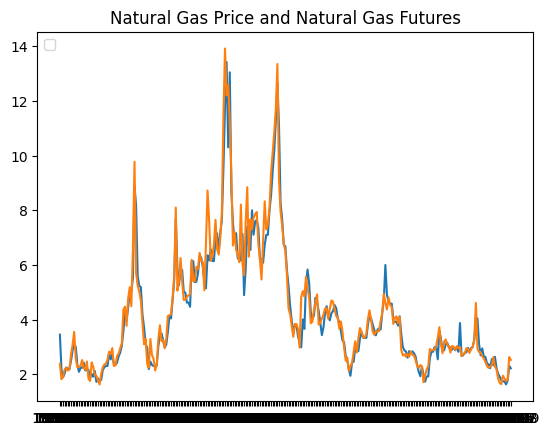

In [30]:
#Natural Gas Price and Futures
df = pd.read_csv("output.csv")
plt.title('Natural Gas Price and Natural Gas Futures')
plt.plot(df.Month, df.Data2, df.Data3)
plt.legend(loc='upper left')

In [20]:
#Correlation between HDD and Natural Gas Price Directly
slope, intercept, r_value, p_value, std_err = linregress(df.Data1, df.Data2)
r_squared = r_value ** 2

print(f'R-squared value: {r_squared}')

R-squared value: 0.007060356479383214


In [21]:
#Correlation between Natural Gas Price and Oil Future Price Directly
slope, intercept, r_value, p_value, std_err = linregress(df.Data2, df.Data3)
r_squared = r_value ** 2

print(f'R-squared value: {r_squared}')

R-squared value: 0.9385522612634526


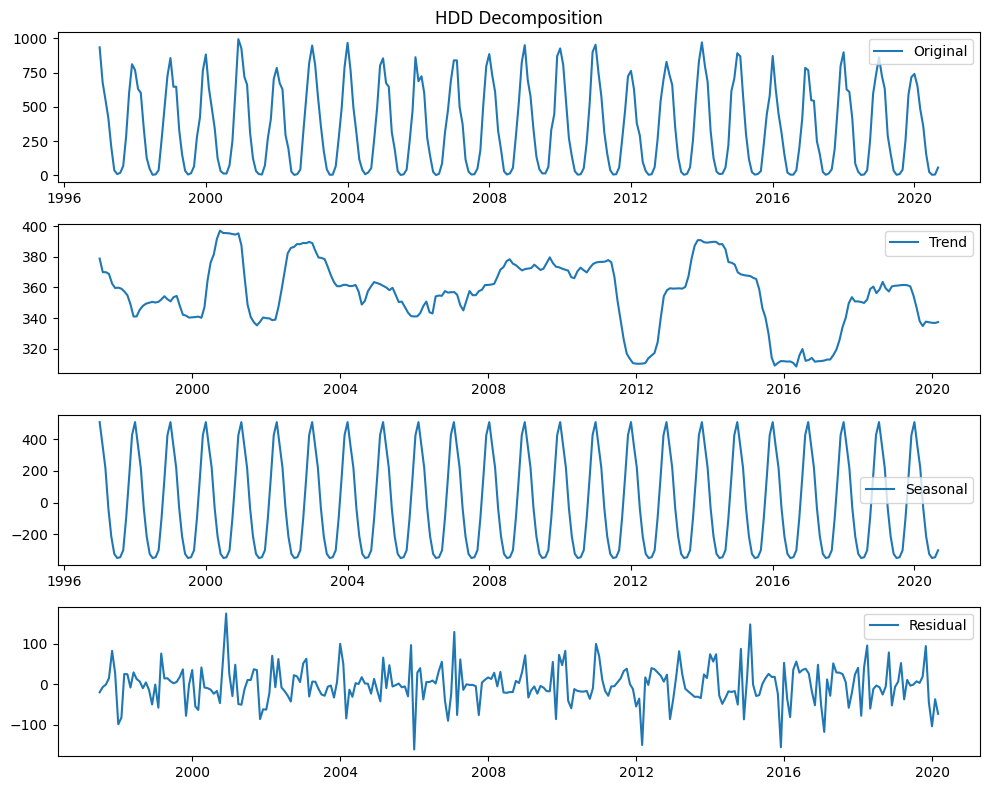

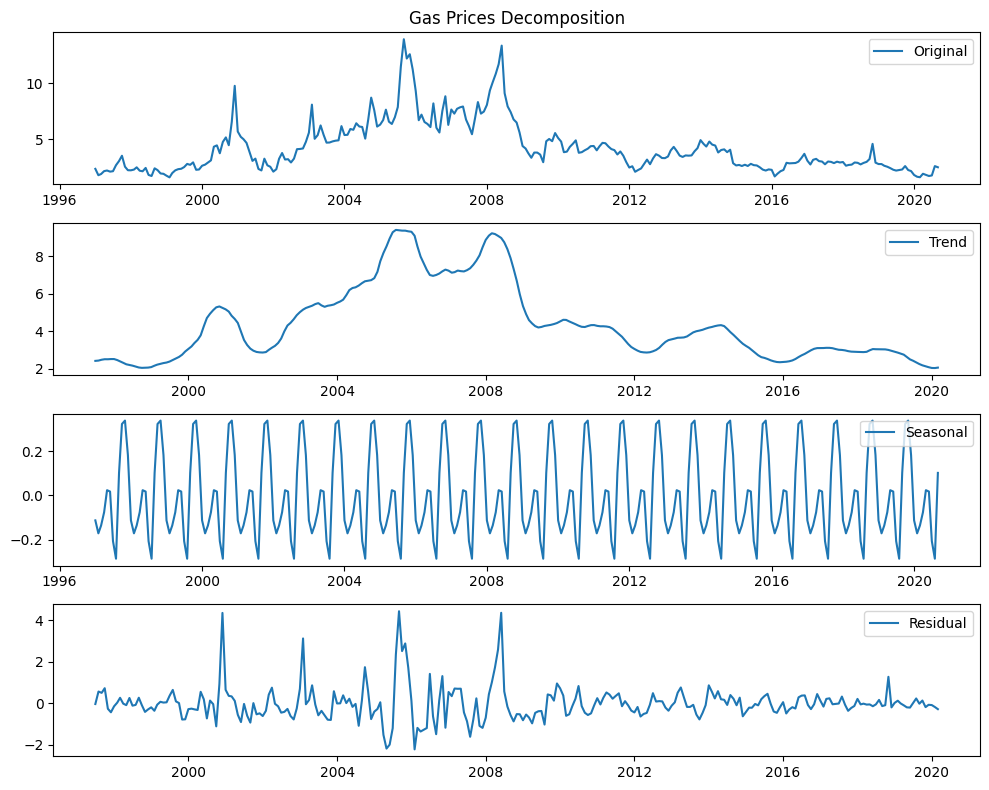

In [22]:
#Seasonal decomposition of HDD and Natural Gas
df = pd.read_csv("output.csv")

df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Apply seasonal decomposition to HDD
decomposition_hdd = seasonal_decompose(df['Data1'], model='additive', period=12)

# Apply seasonal decomposition to Gas Prices
decomposition_gas = seasonal_decompose(df['Data3'], model='additive', period=12)

# Plot the decomposed components for HDD
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
axes[0].set_title('HDD Decomposition')
axes[0].plot(df['Data1'], label='Original')
axes[1].plot(decomposition_hdd.trend, label='Trend')
axes[2].plot(decomposition_hdd.seasonal, label='Seasonal')
axes[3].plot(decomposition_hdd.resid, label='Residual')
for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()

# Plot the decomposed components for Gas Prices
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
axes[0].set_title('Gas Prices Decomposition')
axes[0].plot(df['Data3'], label='Original')
axes[1].plot(decomposition_gas.trend, label='Trend')
axes[2].plot(decomposition_gas.seasonal, label='Seasonal')
axes[3].plot(decomposition_gas.resid, label='Residual')
for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()


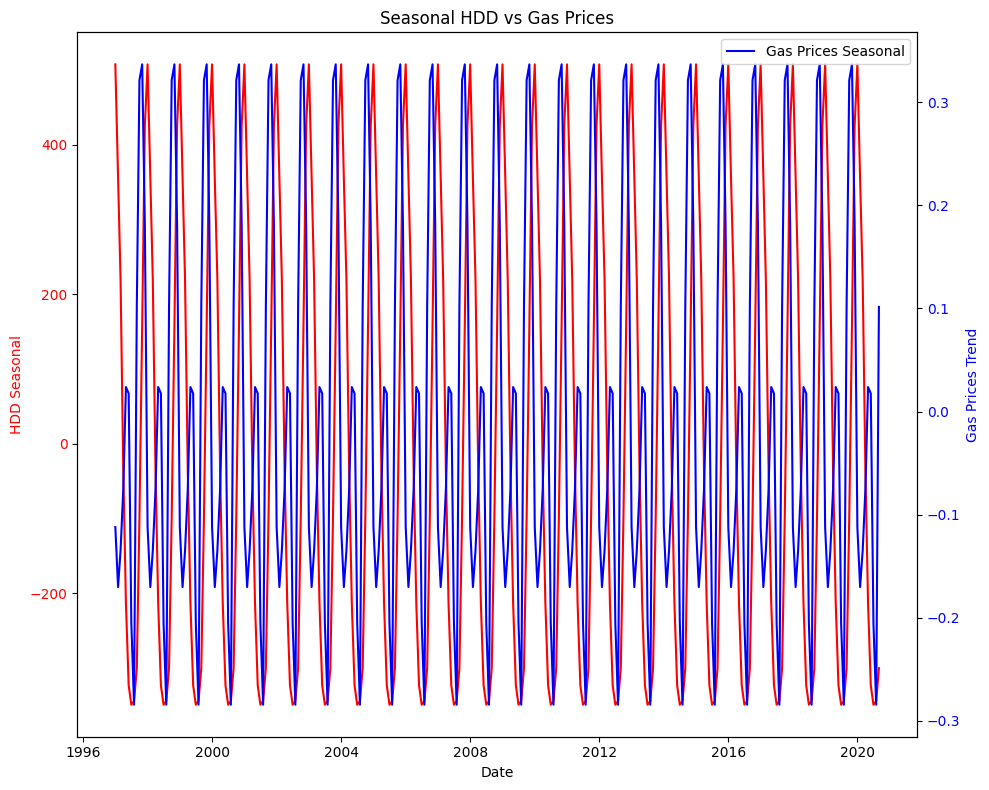

R-squared value between HDD and Gas Prices seaonal Trends 0.012683203374503208


In [23]:
#Seasonal Comparisons of HDD and Natural Gas Trends

# Create subplots with shared x-axis
fig, ax1 = plt.subplots(figsize=(10, 8))

hdd_seasonal = decomposition_hdd.seasonal
gas_seasonal = decomposition_gas.seasonal

# Plot HDD Trend on the left y-axis (red)
ax1.plot(df.index, hdd_seasonal, color='red', label='HDD Seasonal')
ax1.set_xlabel('Date')
ax1.set_ylabel('HDD Seasonal', color='red')
for label in ax1.get_yticklabels():
    label.set_color('red')

# Create a second y-axis for Gas Prices on the right side (blue)
ax2 = ax1.twinx()
ax2.plot(df.index, gas_seasonal, color='blue', label='Gas Prices Seasonal')
ax2.set_ylabel('Gas Prices Trend', color='blue')
for label in ax2.get_yticklabels():
    label.set_color('blue')

plt.title('Seasonal HDD vs Gas Prices')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate linear regression between HDD and Gas Prices trend lines
slope, intercept, r_value, p_value, std_err = linregress(hdd_seasonal.dropna(), gas_seasonal.dropna())
r_squared = r_value ** 2
print(f'R-squared value between HDD and Gas Prices seaonal Trends {r_squared}')

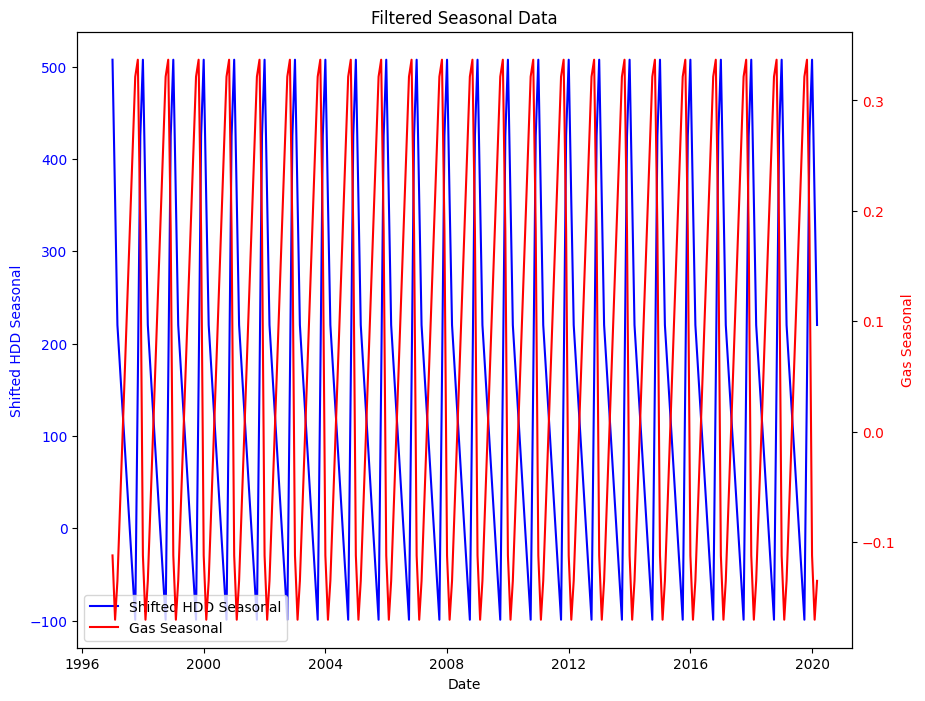

R-squared correlation: 0.37546569156276677


In [24]:
#Seasonal analysis while removing warmer months

hdd_seasonal = hdd_seasonal[~hdd_seasonal.index.month.isin([4, 5, 6, 7, 8,9])]
gas_seasonal = gas_seasonal[~gas_seasonal.index.month.isin([4, 5, 6, 7, 8,9])]

fig, ax1 = plt.subplots(figsize=(10, 8))

# Plotting the first dataset on the primary y-axis
ax1.plot(hdd_seasonal.index, hdd_seasonal, color='blue', label='Shifted HDD Seasonal')
ax1.set_xlabel('Date')
ax1.set_ylabel('Shifted HDD Seasonal', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(gas_seasonal.index, gas_seasonal, color='red', label='Gas Seasonal')
ax2.set_ylabel('Gas Seasonal', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combining legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels)

plt.title('Filtered Seasonal Data')
plt.show()


# Calculating R-squared correlation
correlation = linregress(hdd_seasonal.values, gas_seasonal.values).rvalue ** 2
print(f"R-squared correlation: {correlation}")

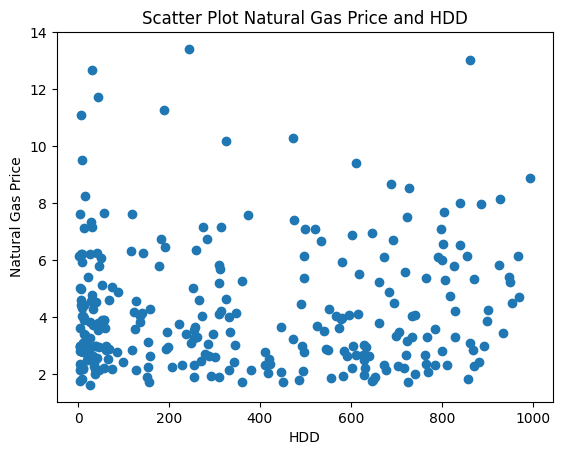

In [25]:
#Scatter Plot of Gas Price and HDD
df = pd.read_csv("output.csv")

df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

plt.scatter(df.Data1, df.Data2)
plt.title('Scatter Plot Natural Gas Price and HDD')
plt.xlabel('HDD')
plt.ylabel('Natural Gas Price')
plt.show()

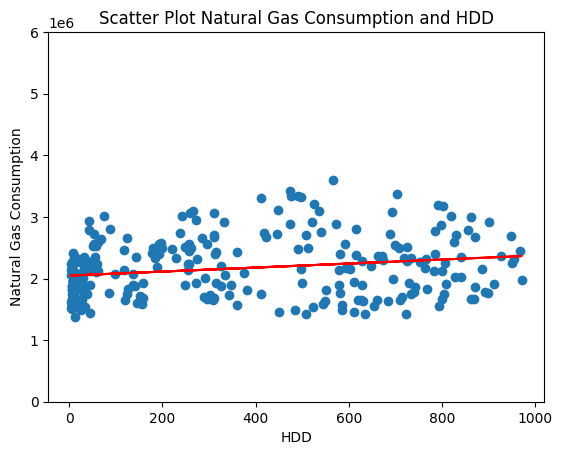

Correlation coefficient (r): 0.2066437470711324
R-squared value: 0.04270163820359814


In [26]:
#Natural Gas Consumption Vs HDD
df = pd.read_csv("consumption.csv")

df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

plt.scatter(df.Data1, df.Data2)
plt.title('Scatter Plot Natural Gas Consumption and HDD')
plt.xlabel('HDD')
plt.ylabel('Natural Gas Consumption')
plt.ylim(0, 6000000)


# Calculate the best-fit line
fit = np.polyfit(df.Data1, df.Data2, 1)
fit_fn = np.poly1d(fit)

# Plot the best-fit line
plt.plot(df.Data1, fit_fn(df.Data1), color='red')
plt.show()

correlation_matrix = np.corrcoef(df.Data1, df.Data2)
correlation_xy = correlation_matrix[0,1]

print("Correlation coefficient (r):", correlation_xy)
r_squared = correlation_xy ** 2
print("R-squared value:", r_squared)

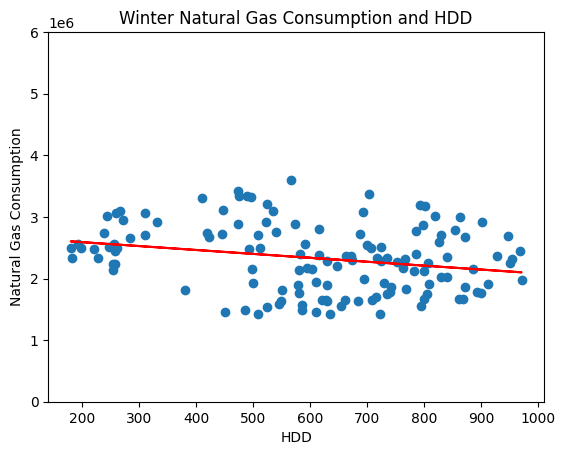

Correlation coefficient (r): -0.24812772920234585
R-squared value: 0.06156736999911268


In [27]:
#Same HDD vs Consumption but with warm months removed
df = pd.read_csv("consumption.csv")

df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Filtering out specific months
df = df[~df.index.month.isin([4, 5, 6, 7, 8, 9])]

# Drop NaN values if present
df.dropna(subset=['Data1', 'Data2'], inplace=True)

plt.scatter(df.Data1, df.Data2)
plt.title('Winter Natural Gas Consumption and HDD')
plt.xlabel('HDD')
plt.ylabel('Natural Gas Consumption')
plt.ylim(0, 6000000)

# Calculate the best-fit line
fit = np.polyfit(df.Data1, df.Data2, 1)
fit_fn = np.poly1d(fit)

# Plot the best-fit line
plt.plot(df.Data1, fit_fn(df.Data1), color='red')

plt.show()

correlation_matrix = np.corrcoef(df.Data1, df.Data2)
correlation_xy = correlation_matrix[0,1]

print("Correlation coefficient (r):", correlation_xy)
r_squared = correlation_xy ** 2
print("R-squared value:", r_squared)